In [1]:
import pandas as pd 

In [2]:
%pwd

'e:\\GAN for Face expression Classification\\final deployment'

In [3]:
import pandas as pd

# Load the first CSV file
face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the second CSV file
voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\karti\AppData\Local\Temp\ipykernel_26468\3532732736.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  face_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\karti\AppData\Local\Temp\ipykernel_26468\3532732736.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voice_emotions = pd.read_csv(r'E:\GAN for Face expression Classification\final deployment\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [4]:
print(face_emotions)

                   time face_emotion
0   2024-04-25 02:47:25      neutral
1   2024-04-25 02:47:25        happy
2   2024-04-25 02:47:34      neutral
3   2024-04-25 02:47:35        happy
4   2024-04-25 02:47:36        happy
..                  ...          ...
66  2024-04-25 02:48:50        happy
67  2024-04-25 02:48:51        happy
68  2024-04-25 02:48:52         fear
69  2024-04-25 02:48:54      neutral
70  2024-04-25 02:48:56         fear

[71 rows x 2 columns]


In [5]:
print(voice_emotions)

                   time voice emotion
0   2024-04-25 02:47:31          fear
1   2024-04-25 02:47:39         happy
2   2024-04-25 02:47:46       disgust
3   2024-04-25 02:47:54         happy
4   2024-04-25 02:48:02       disgust
5   2024-04-25 02:48:10         happy
6   2024-04-25 02:48:18       disgust
7   2024-04-25 02:48:25         happy
8   2024-04-25 02:48:33         happy
9   2024-04-25 02:48:41         happy
10  2024-04-25 02:48:49         happy
11  2024-04-25 02:48:57         happy
12  2024-04-25 02:49:04         happy


In [6]:
# Merge the DataFrames based on time
merged_df = pd.merge(face_emotions, voice_emotions, on='time', how='outer')

# Set 'time' column as index
merged_df.set_index('time', inplace=True)


# Display head of merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)



Merged DataFrame:
                    face_emotion voice emotion
time                                          
2024-04-25 02:47:25      neutral           NaN
2024-04-25 02:47:25        happy           NaN
2024-04-25 02:47:31          NaN          fear
2024-04-25 02:47:34      neutral           NaN
2024-04-25 02:47:35        happy           NaN
...                          ...           ...
2024-04-25 02:48:52         fear           NaN
2024-04-25 02:48:54      neutral           NaN
2024-04-25 02:48:56         fear           NaN
2024-04-25 02:48:57          NaN         happy
2024-04-25 02:49:04          NaN         happy

[76 rows x 2 columns]


In [7]:
# Fill NaN values with a placeholder, limit to one consecutive NaN value
merged_df_filled = merged_df.fillna(method='ffill', limit=1)

# Reset index
merged_df_filled.reset_index(inplace=True)

# Display head of merged DataFrame after filling NaNs
print("\nMerged DataFrame with limited consecutive NaNs:")
print(merged_df_filled)


Merged DataFrame with limited consecutive NaNs:
                   time face_emotion voice emotion
0   2024-04-25 02:47:25      neutral           NaN
1   2024-04-25 02:47:25        happy           NaN
2   2024-04-25 02:47:31        happy          fear
3   2024-04-25 02:47:34      neutral          fear
4   2024-04-25 02:47:35        happy           NaN
..                  ...          ...           ...
71  2024-04-25 02:48:52         fear           NaN
72  2024-04-25 02:48:54      neutral           NaN
73  2024-04-25 02:48:56         fear           NaN
74  2024-04-25 02:48:57         fear         happy
75  2024-04-25 02:49:04          NaN         happy

[76 rows x 3 columns]


C:\Users\karti\AppData\Local\Temp\ipykernel_26468\2794070047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled = merged_df.fillna(method='ffill', limit=1)


In [8]:
merged_df_filled.columns

Index(['time', 'face_emotion', 'voice emotion'], dtype='object')

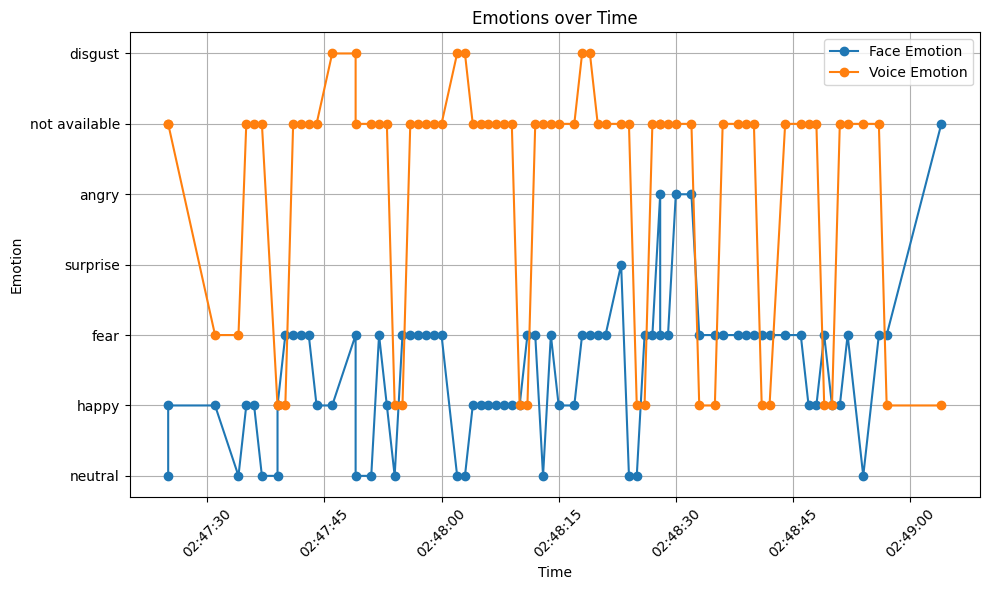

In [9]:
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format
merged_df_filled['time'] = pd.to_datetime(merged_df_filled['time'])

# Set 'time' column as index
merged_df_filled.set_index('time', inplace=True)

# Fill NaN values with a placeholder
merged_df_filled = merged_df_filled.fillna('not available')

# Plot emotions over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['face_emotion'], label='Face Emotion', marker='o')
plt.plot(merged_df_filled.index, merged_df_filled['voice emotion'], label='Voice Emotion', marker='o')
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.title('Emotions over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
print(merged_df_filled)


                      face_emotion  voice emotion
time                                             
2024-04-25 02:47:25        neutral  not available
2024-04-25 02:47:25          happy  not available
2024-04-25 02:47:31          happy           fear
2024-04-25 02:47:34        neutral           fear
2024-04-25 02:47:35          happy  not available
...                            ...            ...
2024-04-25 02:48:52           fear  not available
2024-04-25 02:48:54        neutral  not available
2024-04-25 02:48:56           fear  not available
2024-04-25 02:48:57           fear          happy
2024-04-25 02:49:04  not available          happy

[76 rows x 2 columns]


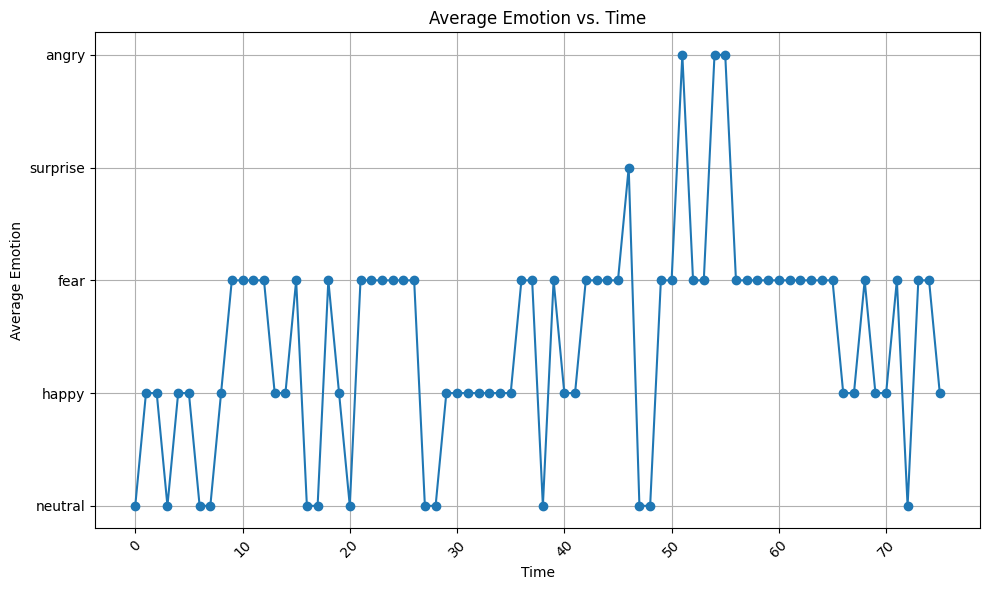

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate average emotion
def calculate_average_emotion(row):
    face_emotion = row['face_emotion']
    voice_emotion = row['voice emotion']

    # If both face and voice emotions are NaN, return NaN
    if face_emotion == "not available" and voice_emotion == "not available":
        return "not available"

    # If face emotion is NaN or voice emotion is NaN, use the other value
    elif face_emotion == "not available":
        return voice_emotion

    elif voice_emotion == "not available":
        return face_emotion

    # If both face and voice emotions are available, use only face emotion
    else:
        return face_emotion

merged_df_filled.reset_index(inplace=True)
# Apply the function to calculate average emotion for each row
merged_df_filled['average_emotion'] = merged_df_filled.apply(calculate_average_emotion, axis=1)

# Plot emotion vs. time graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['average_emotion'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Emotion')
plt.title('Average Emotion vs. Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
df = merged_df_filled

df

,time,face_emotion,voice emotion,average_emotion
0,2024-04-25 02:47:25,neutral,not available,neutral
1,2024-04-25 02:47:25,happy,not available,happy
2,2024-04-25 02:47:31,happy,fear,happy
3,2024-04-25 02:47:34,neutral,fear,neutral
4,2024-04-25 02:47:35,happy,not available,happy
...,...,...,...,...
71,2024-04-25 02:48:52,fear,not available,fear
72,2024-04-25 02:48:54,neutral,not available,neutral
73,2024-04-25 02:48:56,fear,not available,fear
74,2024-04-25 02:48:57,fear,happy,fear


In [13]:
import pandas as pd
from statistics import mode

# Calculate mode of the average_emotion column
mode_emotion = mode(df['average_emotion'])

print("Mode emotion:", mode_emotion)


Mode emotion: fear


In [14]:
import pandas as pd
from collections import Counter

# Calculate mode of the average_emotion column
mode_emotions = Counter(df['average_emotion']).most_common(7)

print("Top 7 emotions based on mode:")
for emotion, count in mode_emotions:
    print(emotion, ":", count)


Top 7 emotions based on mode:
fear : 37
happy : 22
neutral : 13
angry : 3
surprise : 1
